In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("ggplot")
sns.set_theme()


In [4]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv")

df.head()


ID Case Number                    Date                  Block  IUCR  \
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486   
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870   
2  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810   
3  10224740    HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE  2023   
4  10224741    HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE  0560   

  Primary Type              Description Location Description  Arrest  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
1        THEFT           POCKET-PICKING              CTA BUS   False   
2        THEFT                OVER $500            RESIDENCE   False   
3    NARCOTICS    POSS: HEROIN(BRN/TAN)             SIDEWALK    True   
4      ASSAULT                   SIMPLE            APARTMENT   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0      True  ...  12.0            61.0       08B     1165074.0    1875917.0   
1     False  ...  29.0            25.0        06     1138875.0    1904869.0   
2      True  ...   8.0            44.0        06           NaN          NaN   
3     False  ...  35.0            21.0        18     1152037.0    1920384.0   
4      True  ...  28.0            25.0       08A     1141706.0    1900086.0   

   Year              Updated On   Latitude  Longitude  \
0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000   
1  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400   
2  2018  04/06/2019 04:04:43 PM        NaN        NaN   
3  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650   
4  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121   

                        Location  
0  (41.815117282, -87.669999562)  
1  (41.895080471, -87.765400451)  
2                            NaN  
3  (41.937405765, -87.716649687)  
4  (41.881903443, -87.755121152)  

[5 rows x 22 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour


In [31]:
df = df.dropna(subset=['Latitude', 'Longitude'])


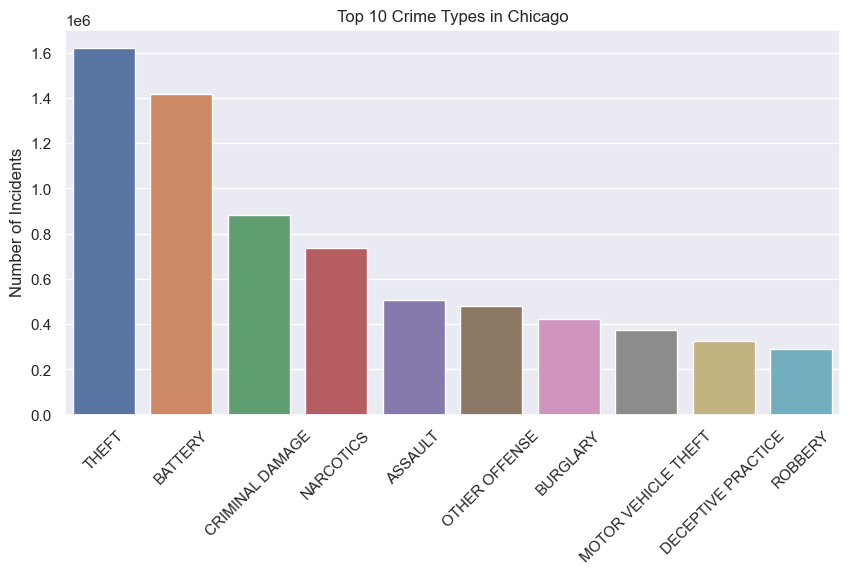

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
top = df['Primary Type'].value_counts().head(10)

sns.barplot(x=top.index, y=top.values)
plt.title("Top 10 Crime Types in Chicago")
plt.xticks(rotation=45)
plt.ylabel("Number of Incidents")
plt.show()


In [33]:
crime_by_year = (
    df.groupby(['Year', 'Primary Type'])
      .size()
      .reset_index(name='Count')
)
crime_by_year.head()


Year         Primary Type  Count
0  2001                ARSON   1005
1  2001              ASSAULT  31260
2  2001              BATTERY  93050
3  2001             BURGLARY  25943
4  2001  CRIM SEXUAL ASSAULT   1747

In [34]:
top10_by_year = (
    crime_by_year
    .sort_values(['Year', 'Count'], ascending=[True, False])
    .groupby('Year')
    .head(10)
)
top10_by_year.head()


Year     Primary Type  Count
29  2001            THEFT  98447
2   2001          BATTERY  93050
5   2001  CRIMINAL DAMAGE  55590
17  2001        NARCOTICS  50318
1   2001          ASSAULT  31260

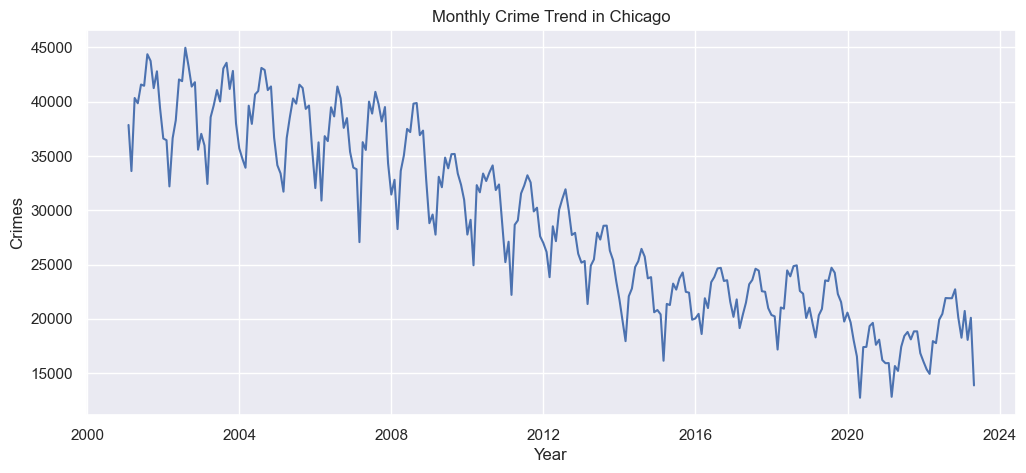

In [35]:
monthly = df.resample('M', on='Date').size()

plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values)
plt.title("Monthly Crime Trend in Chicago")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.show()


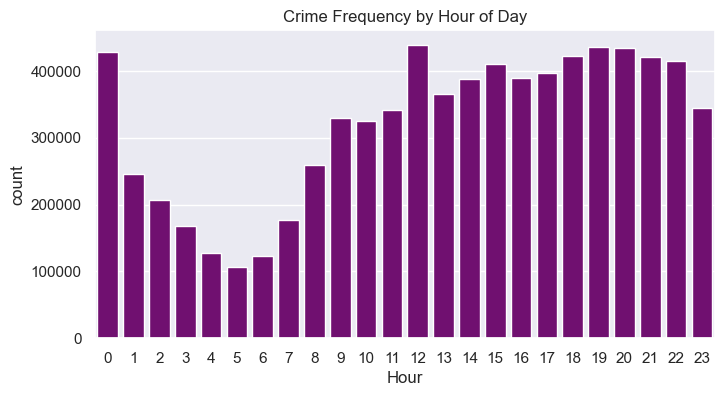

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(x='Hour', data=df, color='purple')
plt.title("Crime Frequency by Hour of Day")
plt.show()


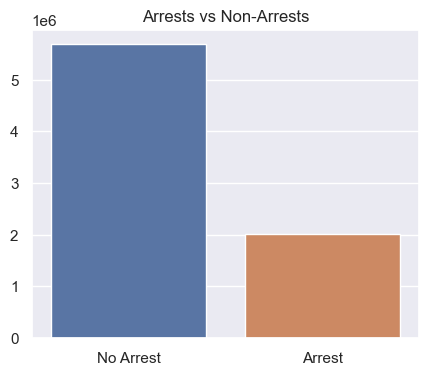

In [37]:
arrest_counts = df['Arrest'].value_counts()

plt.figure(figsize=(5,4))
sns.barplot(x=arrest_counts.index, y=arrest_counts.values)
plt.title("Arrests vs Non-Arrests")
plt.xticks([0,1], ['No Arrest', 'Arrest'])
plt.show()


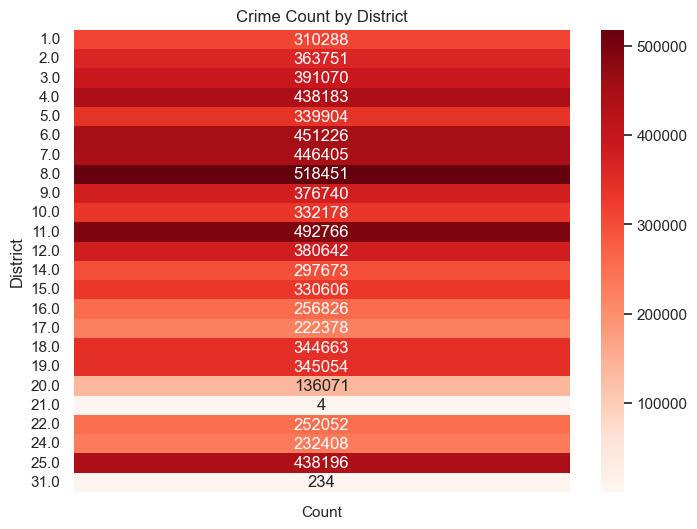

In [38]:
district_crime = df.groupby('District').size().reset_index(name='Count')

plt.figure(figsize=(8,6))
sns.heatmap(
    district_crime.pivot_table(index='District', values='Count'),
    cmap='Reds',
    annot=True,
    fmt=".0f"
)
plt.title("Crime Count by District")
plt.show()


In [39]:
!pip install folium


In [40]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

heat_data = df[['Latitude', 'Longitude']].values.tolist()

HeatMap(heat_data[:50000]).add_to(m)

m

In [41]:
m.save("chicago_crime_heatmap.html")


In [42]:
!pip install -U kaleido

In [5]:


df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

crime_by_year = (
    df.groupby(["Year", "Primary Type"])
      .size()
      .reset_index(name="Count")
)

top10_by_year = (
    crime_by_year
    .sort_values(["Year", "Count"], ascending=[True, False])
    .groupby("Year")
    .head(10)
)
top10_by_year.head()


Year     Primary Type  Count
30  2001            THEFT  99277
2   2001          BATTERY  93460
6   2001  CRIMINAL DAMAGE  55858
18  2001        NARCOTICS  50567
1   2001          ASSAULT  31384

In [6]:
import plotly.express as px

fig = px.bar(
    top10_by_year,
    x="Primary Type",
    y="Count",
    color="Primary Type",
    animation_frame="Year",
    animation_group="Primary Type",
    title="Top 10 Crime Types in Chicago by Year",
    hover_data=["Year", "Count"],
)

fig.update_layout(
    xaxis_title="Crime Type",
    yaxis_title="Number of Incidents",
    xaxis_tickangle=45,
    showlegend=False  
)

fig.show()



/Users/willowolabi/Documents/anaconda3/lib/python3.10/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [7]:
years = sorted(top10_by_year["Year"].unique())

def make_year_fig(year):
    d = top10_by_year[top10_by_year["Year"] == year].sort_values("Count", ascending=False)
    return px.bar(
        d,
        x="Primary Type",
        y="Count",
        color="Primary Type",
        title=f"Top 10 Crime Types in Chicago ({year})",
        hover_data=["Count"],
    )

fig = make_year_fig(years[0])

fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": str(y),
                    "method": "update",
                    "args": [
                        {"x": [top10_by_year[top10_by_year["Year"] == y]["Primary Type"]],
                         "y": [top10_by_year[top10_by_year["Year"] == y]["Count"]]},
                        {"title": f"Top 10 Crime Types in Chicago ({y})"}
                    ],
                }
                for y in years
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.show()
